In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
import numpy as np
import lavavu
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Please add SURFE to your environment variables to specify the location 
 of the SURFE binaries
Cannot import Surfe


In [2]:
dips = pd.read_csv('../Moureze_Points.csv',delimiter=';')
points_file_names = ['../Moureze_Points.csv']
section_file_names = ['../Sections_EW.csv','../Sections_NS.csv']
dips = dips.rename(columns={'OrientX':'nx','OrientY':'ny','OrientZ':'nz'})

# import all of the csv into the same dataframe
dfs = []
for f in points_file_names:
    dfs.append(pd.read_csv(f,delimiter=';'))
points = pd.concat(dfs,axis=0,ignore_index=True)
# sections
dfs = []
for f in section_file_names:
    dfs.append(pd.read_csv(f,delimiter=';'))
sections = pd.concat(dfs,axis=0,ignore_index=True)
sections['val'] = 0
points.loc[points['OrientX']<-2,['OrientX','OrientY','OrientZ']] = np.nan
points = points.rename(columns={'OrientX':'nx','OrientY':'ny','OrientZ':'nz'})

points['val'] = 0
# data = pd.concat(dips,se)
# apoints = pd.read_csv('APoints.csv',delimiter=';')
# asection = pd.read_csv('ASection.csv',delimiter=';')

In [3]:
data = pd.concat([points,sections])
data['type'] = 'strati'

In [4]:
boundary_points = np.zeros((2,3))

boundary_points[0,0] = -5
boundary_points[0,1] = -5
boundary_points[0,2] = -200
boundary_points[1,0] = 305
boundary_points[1,1] = 405
boundary_points[1,2] = -50


## PLI 1e5

In [5]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(data)
strati = model.create_and_add_foliation("strati", 
                                           interpolatortype="PLI",
                                           nelements=1e5,
                                           buffer=0.2,
                                           solver='pyamg',
                                           damp=True,
                                       )

'type' is being replaced with 'feature_name' 

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/interpolators/structured_tetra.py:193: RuntimeWarning: invalid value encountered in greater
  mask = np.all(c > 0, axis=2)
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/interpolators/structured_tetra.py:382: RuntimeWarning: invalid value encountered in greater_equal
  inside = np.logical_and(inside, pos[:, i] >= self.origin[None, i])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/interpolators/structured_tetra.py:383: RuntimeWarning: invalid value encountered in less_equal
  inside = np.logical_and(inside,pos[:, i] <= self.origin[None, i] + \



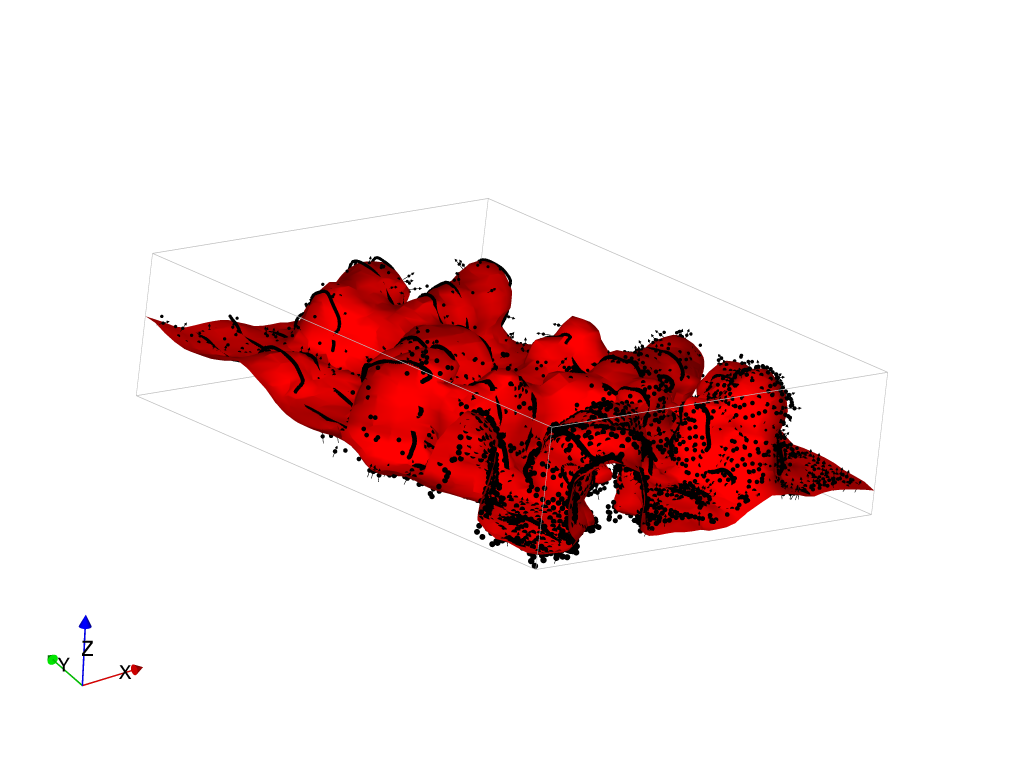

In [8]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(strati['feature'],isovalue=0)
viewer.add_data(strati['feature'])
viewer.rotation = [-66.86392211914062, 41.50455856323242, 9.293912887573242]
viewer.display('moureze_pli_1e5.png')

In [9]:
viewer.rotation

[-66.86392974853516, 41.50456237792969, 9.293912887573242]

In [10]:
from LoopStructural.utils.utils import write_property_to_gocad_voxet, read_voxet
origin, voxet_extent, N, array, steps = read_voxet('Results.vo','ResultsLoopStructural_result@@')
x = np.linspace(origin[0],voxet_extent[0]+origin[0],N[0])
y = np.linspace(origin[1],voxet_extent[1]+origin[1],N[1])
z = np.linspace(origin[2],voxet_extent[2]+origin[2],N[2])

xx, yy, zz = np.meshgrid(x,y,z,indexing='ij')
eval_points = model.scale(np.array([xx.flatten(order='F'),yy.flatten(order='F'),zz.flatten(order='F')]).T)
vals = strati['feature'].evaluate_value(eval_points)
vals2 = vals.reshape((N[2],N[1],N[0]))
write_property_to_gocad_voxet('ResultsLoopStructural_result@@',vals2.flatten(order='C'))

## FDI 2e4

In [11]:
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(data)
strati = model.create_and_add_foliation("strati", 
                                           interpolatortype="FDI",
                                           nelements=2e4,
                                           buffer=0.2,
                                           solver='pyamg',
                                           damp=True,
                                       )

'type' is being replaced with 'feature_name' 

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/interpolators/structured_grid.py:150: RuntimeWarning: invalid value encountered in greater
  inside *= pos[:, i] > self.origin[None, i]
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-1.0.3-py3.8-linux-x86_64.egg/LoopStructural/interpolators/structured_grid.py:151: RuntimeWarning: invalid value encountered in less
  inside *= pos[:, i] < self.origin[None, i] + \



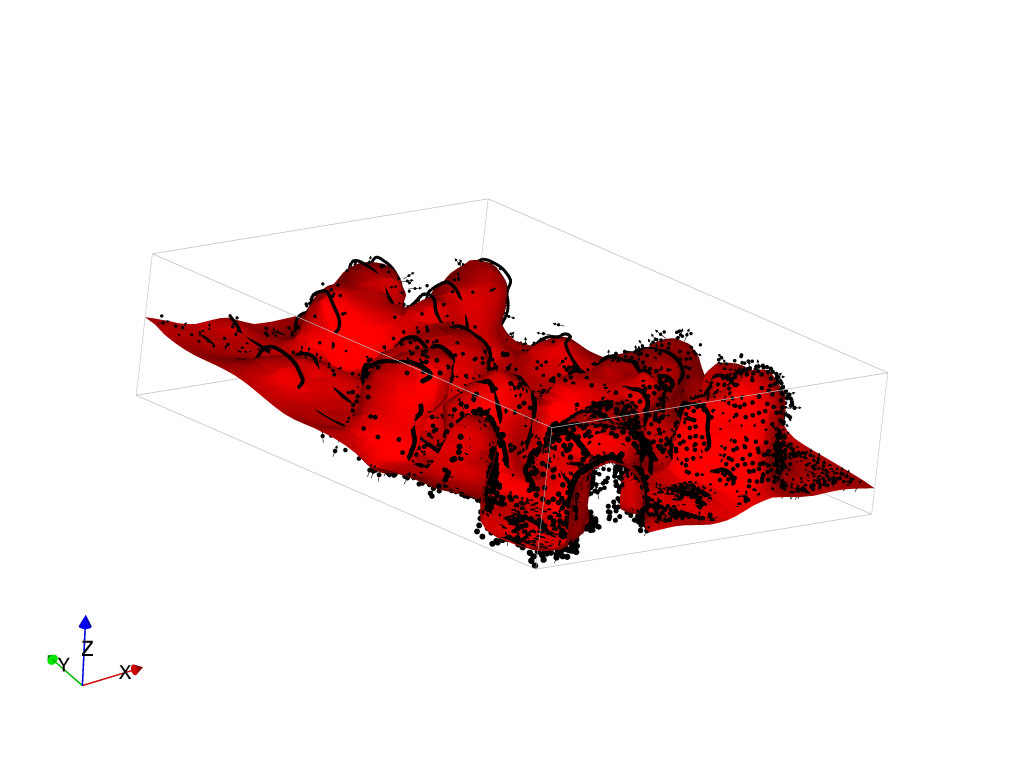

In [12]:
viewer = LavaVuModelViewer(model)
viewer.add_isosurface(strati['feature'],isovalue=0)
viewer.add_data(strati['feature'])
viewer.rotation = [-66.86392211914062, 41.50455856323242, 9.293912887573242]
viewer.display('moureze_FDI_2e4.png')

In [14]:
from LoopStructural.utils.utils import write_property_to_gocad_voxet, read_voxet
origin, voxet_extent, N, array, steps = read_voxet('Results.vo','ResultsLoopStructural_result@@')
x = np.linspace(origin[0],voxet_extent[0]+origin[0],N[0])
y = np.linspace(origin[1],voxet_extent[1]+origin[1],N[1])
z = np.linspace(origin[2],voxet_extent[2]+origin[2],N[2])

xx, yy, zz = np.meshgrid(x,y,z,indexing='ij')
eval_points = model.scale(np.array([xx.flatten(order='F'),yy.flatten(order='F'),zz.flatten(order='F')]).T)
vals = strati['feature'].evaluate_value(eval_points)
vals2 = vals.reshape((N[2],N[1],N[0]))
write_property_to_gocad_voxet('ResultsLoopStructural_result_FDI_2e4@@',vals2.flatten(order='C'))